# **Importing the Libraries**

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# **Importing the Dataset**

In [66]:
dataset=pd.read_csv('Train_cluster.csv')
df=dataset.drop(['ID','Segmentation'],axis=1)

# **Handling the Missing data**

In [67]:
# The imputation is now handled after one-hot encoding in cell iyQrz7fNpzAI
from sklearn.impute import SimpleImputer

missing=df.columns[df.isnull().any()].tolist()
print(missing)
numerical_cols = df[missing].select_dtypes(include=np.number).columns.tolist()
categorical_cols = df[missing].select_dtypes(exclude=np.number).columns.tolist()

imputer_mean = SimpleImputer(missing_values=np.nan,strategy='median')
df[numerical_cols] = imputer_mean.fit_transform(df[numerical_cols])

imputer_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df[categorical_cols] = imputer_mode.fit_transform(df[categorical_cols])

print(df.isnull().sum())

['Ever_Married', 'Graduated', 'Profession', 'Work_Experience', 'Family_Size', 'Var_1']
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


# **Encoding Categorial data**

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X = np.array(ct.fit_transform(df))


print("One-hot encoding applied to categorical columns.")

One-hot encoding applied to categorical columns.


# **Using Elbow Idea**

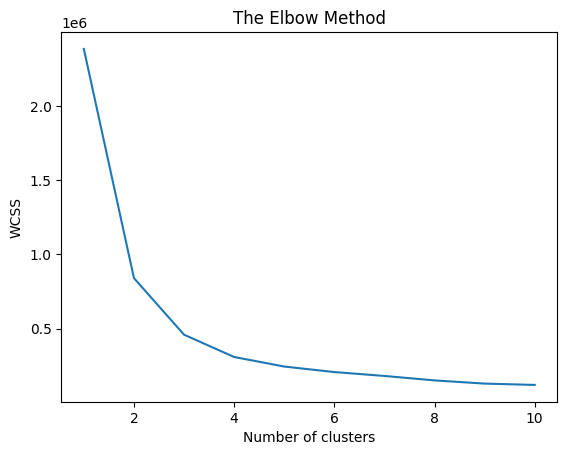

In [70]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Training the kmeans model**

In [71]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 0 1 ... 0 3 0]


# **Displaying the results**

In [75]:
# Create a new DataFrame from the preprocessed data (X) and add the cluster labels
# We need to get the original column names plus the new one-hot encoded ones.
# This can be complex, so for simplicity, let's create a DataFrame with generic names
# or try to reconstruct the column names from the ColumnTransformer if needed.
# A more robust approach is to add the cluster labels to the original df before dropping columns if possible,
# but the current flow transforms df into X, a numpy array.

# Let's create a DataFrame from X and add the cluster labels.
# Getting meaningful column names for the transformed X can be tricky.
# For display purposes here, we'll just use a simple approach.

# Convert X back to a DataFrame to add the cluster labels
# We need column names. Getting meaningful names after one-hot encoding is complex.
# Let's create a DataFrame with numerical column names for now.

df['Cluster']=y_kmeans

print("Data for Cluster 0:")
display(df[df['Cluster'] == 0].head())

print("\nData for Cluster 1:")
display(df[df['Cluster'] == 1].head())

print("\nData for Cluster 2:")
display(df[df['Cluster'] == 2].head())

print("\nData for Cluster 3:")
display(df[df['Cluster'] == 3].head())

# You might want to consider adding the cluster labels to your original df before
# dropping columns for clustering if you need to analyze original features alongside clusters easily.

Data for Cluster 0:


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,0
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,0
7,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,0
15,Female,No,41,No,Healthcare,1.0,Low,2.0,Cat_1,0
22,Male,Yes,33,Yes,Artist,13.0,Low,2.0,Cat_3,0



Data for Cluster 1:


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,1
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,1
13,Male,Yes,70,No,Lawyer,1.0,Low,1.0,Cat_6,1
19,Female,Yes,79,Yes,Artist,0.0,High,1.0,Cat_6,1
34,Female,Yes,83,No,Lawyer,1.0,High,2.0,Cat_6,1



Data for Cluster 2:


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,2
8,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,2
9,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,2
14,Female,Yes,58,No,Doctor,0.0,Low,1.0,Cat_3,2
18,Male,Yes,58,Yes,Entertainment,1.0,Average,4.0,Cat_6,2



Data for Cluster 3:


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,3
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,3
10,Female,No,26,Yes,Engineer,1.0,Low,3.0,Cat_6,3
11,Male,No,19,No,Healthcare,4.0,Low,4.0,Cat_4,3
12,Female,No,19,No,Executive,0.0,Low,3.0,Cat_3,3


 ** Testing the**  **model**

In [ ]:
# Load the new dataset
df_test = pd.read_csv('test_cluster.csv')
display(df_test.head())

# **datapreproccesing**

In [79]:
# Preprocess the test data using the same transformers fitted on the training data

# Drop the 'Segmentation' column from df_test if it exists, as it's not needed for prediction and wasn't used in ct fitting on training data
if 'ID' in df_test.columns:
    df_test = df_test.drop('ID', axis=1)

# Handle missing values in df_test using the fitted imputers
missing_test = df_test.columns[df_test.isnull().any()].tolist()
numerical_cols_test = df_test[missing_test].select_dtypes(include=np.number).columns.tolist()
categorical_cols_test = df_test[missing_test].select_dtypes(exclude=np.number).columns.tolist()

# Use the already fitted imputer_mean and imputer_mode
if numerical_cols_test: # Check if the list is not empty
    df_test[numerical_cols_test] = imputer_mean.fit_transform(df_test[numerical_cols_test])

if categorical_cols_test: # Check if the list is not empty
    df_test[categorical_cols_test] = imputer_mode.fit_transform(df_test[categorical_cols_test])


print("Missing values in df_test after imputation:")
print(df_test.isnull().sum())

# Apply one-hot encoding to df_test using the already fitted ct
# Ensure the columns in df_test match the training columns used for fitting ct (excluding 'Segmentation')
# Get categorical column names as a list from df_test (excluding 'Segmentation' if it somehow exists)
categorical_cols_list_test = df_test.select_dtypes(include=['object']).columns.tolist()
if 'Segmentation' in categorical_cols_list_test:
     categorical_cols_list_test.remove('Segmentation')

# Apply the fitted ColumnTransformer
X_test = ct.transform(df_test)

# Convert sparse matrix to dense array if ct outputted a sparse matrix
if hasattr(X_test, 'toarray'):
    X_test = X_test.toarray()

print("\nShape of preprocessed test data (X_test):", X_test.shape)

Missing values in df_test after imputation:
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

Shape of preprocessed test data (X_test): (2627, 28)


# **Predicting**

In [82]:
# Predict the clusters for the preprocessed test data
y_kmeans_test = kmeans.predict(X_test)

print("Cluster predictions for the test data:")
print("First 10 predictions:", y_kmeans_test[:10])

Cluster predictions for the test data:
First 10 predictions: [0 0 1 2 3 2 2 2 2 3]


In [83]:
# Assuming your original test dataset had an 'ID' column before dropping it for preprocessing
# We need to load the original test dataset again to get the 'ID' column
df_test_original = pd.read_csv('test_cluster.csv')

# Create a submission DataFrame with 'ID' and predicted 'Cluster'
submission_df = pd.DataFrame({'ID': df_test_original['ID'], 'Segmentation': y_kmeans_test})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")
display(submission_df.head())

Submission file 'submission.csv' created successfully!


,ID,Segmentation
0,458989,0
1,458994,0
2,458996,1
3,459000,2
4,459001,3
